### Dataset https://www.kaggle.com/datasets/gadigevishalsai/sachin-tendulkar-100-centuries

### The dataset description is as follows:

- S.No: International Century Number
- Score: Number of runs scored by Sachin in the match
- Dismissed: Whether Sachin is dismissed or not?
- Captain: Is Sachin the captain of the match?
- Player of the match: Did Sachin win the player of the match for his performance?
- Against: The opposition team
- Position: Batting position of Sachin in that match
- Innings: In which innings of the match did Sachin score the century?
- Test: Test match number in the series
- Strike Rate: Number of runs scored per 100 balls
- Venue: The stadium where the match is played
- City: The city in which the stadium is present
- H/A: Is the game played at home or away or at a neutral venue?
- Date: The date on which Sachin scored that century
- Result: Result of the match

### I will try to answer the following questions in this notebook

- How many centuries did Sachin score year-wise?
- What were Sachin's top 10 centuries & in which year?
- Top 5 years in which Sachin scored the most number of runs?
- What was Sachin's year-wise average score?
- What was Sachin's year-wise average strike rate?
- Sachin's performance against each team ( home vs away )
- Sachin's top 5 grounds where he scored the most? 
- Did captaincy affect Sachin's performance (score, strike rate)?
- Sachin's performance innings wise (chasing/1st batting)
- Sachin's best batting position.
- How many times did Sachin get a man of the match after scoring a century?
- How many times India won the match after Sachin scored a century?
- How many times Sachin was unbeaten after scoring a century?

## 1. Importing, data cleaning & transforming

### 1.1 Importing required libraries

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import datetime

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

### 1.2 Looking into the data

In [3]:
df = pd.read_csv('/kaggle/input/sachin-tendulkar-100-centuries/Sachin Tendulkar - 100 Centuries.csv')

In [4]:
df

,S.No.,Score,Dismissed,Captain,Player of the match,Against,Position,Innings,Test,Strike Rate,Venue,City,H/A,Date,Result
0,1,119,No,No,Yes,England,6,4,2.0,NaN,Old Trafford,Manchester,Away,8/9/1990,Drawn
1,2,148,No,No,No,Australia,6,2,3.0,NaN,Sydney Cricket Ground,Sydney,Away,1/2/1992,Drawn
2,3,114,Yes,No,No,Australia,4,2,5.0,NaN,WACA Ground,Perth,Away,2/1/1992,Lost
3,4,111,Yes,No,No,South Africa,4,2,2.0,NaN,Wanderers Stadium,Johannesburg,Away,11/26/1992,Drawn
4,5,165,Yes,No,Yes,England,4,1,2.0,NaN,M. A. Chidambaram Stadium,Chennai,Home,2/11/1993,Won
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,111,No,No,No,South Africa,5,3,1.0,NaN,SuperSport Park,Centurion,Away,12/16/2010,Lost
96,97,146,Yes,No,No,South Africa,4,2,3.0,NaN,Newlands Cricket Ground,Cape Town,Away,1/2/2011,Drawn
97,98,120,Yes,No,No,England,2,1,NaN,104.34,M. Chinnaswamy Stadium,Bangalore,Home,2/27/2011,Tied
98,99,111,Yes,No,No,South Africa,2,1,NaN,109.90,VCA Stadium,Nagpur,Home,3/12/2011,Lost


#### It has 100 rows exactly because the data is about 100 centuries

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   S.No.                100 non-null    int64  
 1   Score                100 non-null    int64  
 2   Dismissed            100 non-null    object 
 3   Captain              100 non-null    object 
 4   Player of the match  100 non-null    object 
 5   Against              100 non-null    object 
 6   Position             100 non-null    int64  
 7   Innings              100 non-null    int64  
 8   Test                 51 non-null     float64
 9   Strike Rate          49 non-null     float64
 10  Venue                100 non-null    object 
 11  City                 100 non-null    object 
 12  H/A                  100 non-null    object 
 13  Date                 100 non-null    object 
 14  Result               100 non-null    object 
dtypes: float64(2), int64(4), object(9)
memory

#### All look good except date. Date column should be converted to datetime object.

In [6]:
df.describe()

,S.No.,Score,Position,Innings,Test,Strike Rate
count,100.000000,100.00000,100.000000,100.000000,51.000000,49.000000
mean,50.500000,135.57000,3.140000,1.630000,2.000000,100.810000
std,29.011492,33.33038,1.206213,0.786952,0.979796,16.102412
min,1.000000,100.00000,1.000000,1.000000,1.000000,72.140000
25%,25.750000,111.00000,2.000000,1.000000,1.000000,88.490000
50%,50.500000,124.00000,4.000000,1.000000,2.000000,97.700000
75%,75.250000,149.00000,4.000000,2.000000,2.500000,110.150000
max,100.000000,248.00000,6.000000,4.000000,5.000000,138.610000


In [7]:
df.isnull().sum()

S.No.                   0
Score                   0
Dismissed               0
Captain                 0
Player of the match     0
Against                 0
Position                0
Innings                 0
Test                   49
Strike Rate            51
Venue                   0
City                    0
H/A                     0
Date                    0
Result                  0
dtype: int64

#### There are 49 null in Test & 51 null in strike rate. Test column is not much useful & strike rate can be filled with average strike rate

In [8]:
df.columns

Index(['S.No.', 'Score', 'Dismissed', 'Captain', 'Player of the match',
       'Against', 'Position', 'Innings', 'Test ', 'Strike Rate', 'Venue',
       'City', 'H/A', 'Date ', 'Result'],
      dtype='object')

#### Test & Date columns have extra space at the end. Removing them

### 1.3 Data cleaning & transformation

In [9]:
df.rename(columns={"Test ":"Test","Date ":"Date"},inplace=True)

In [10]:
df.columns

Index(['S.No.', 'Score', 'Dismissed', 'Captain', 'Player of the match',
       'Against', 'Position', 'Innings', 'Test', 'Strike Rate', 'Venue',
       'City', 'H/A', 'Date', 'Result'],
      dtype='object')

In [11]:
df["Strike Rate"]
df["Strike Rate"].isnull().sum()

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
       ...  
95       NaN
96       NaN
97    104.34
98    109.90
99     77.55
Name: Strike Rate, Length: 100, dtype: float64

51

In [12]:
# Let's do mean imputation
df["Strike Rate"].fillna(df["Strike Rate"].mean(),inplace=True)
df["Strike Rate"]

0     100.81
1     100.81
2     100.81
3     100.81
4     100.81
       ...  
95    100.81
96    100.81
97    104.34
98    109.90
99     77.55
Name: Strike Rate, Length: 100, dtype: float64

In [13]:
df.isnull().sum()

S.No.                   0
Score                   0
Dismissed               0
Captain                 0
Player of the match     0
Against                 0
Position                0
Innings                 0
Test                   49
Strike Rate             0
Venue                   0
City                    0
H/A                     0
Date                    0
Result                  0
dtype: int64



#### Now, there are no nulls. Ignoring Test column

#### Convert date column to datetime type

In [14]:
df["Date"] = pd.to_datetime(df["Date"])
df["Date"]

0    1990-08-09
1    1992-01-02
2    1992-02-01
3    1992-11-26
4    1993-02-11
        ...    
95   2010-12-16
96   2011-01-02
97   2011-02-27
98   2011-03-12
99   2012-03-16
Name: Date, Length: 100, dtype: datetime64[ns]

#### Creating a new column Year from Date

In [15]:
df["Date"][0].date().year # Converts into year

1990

In [16]:
# Applying the same to entire column
df["Year"] = df["Date"].apply(lambda x : x.date().year)

#### Now our dataframe becomes,

In [17]:
df.head(5)

,S.No.,Score,Dismissed,Captain,Player of the match,Against,Position,Innings,Test,Strike Rate,Venue,City,H/A,Date,Result,Year
0,1,119,No,No,Yes,England,6,4,2.0,100.81,Old Trafford,Manchester,Away,1990-08-09,Drawn,1990
1,2,148,No,No,No,Australia,6,2,3.0,100.81,Sydney Cricket Ground,Sydney,Away,1992-01-02,Drawn,1992
2,3,114,Yes,No,No,Australia,4,2,5.0,100.81,WACA Ground,Perth,Away,1992-02-01,Lost,1992
3,4,111,Yes,No,No,South Africa,4,2,2.0,100.81,Wanderers Stadium,Johannesburg,Away,1992-11-26,Drawn,1992
4,5,165,Yes,No,Yes,England,4,1,2.0,100.81,M. A. Chidambaram Stadium,Chennai,Home,1993-02-11,Won,1993


## 2. Exploratory Data Analysis (EDA)

### 2.1 How many centuries did Sachin score year-wise?

In [18]:
px.bar(df.sort_values(['Score'],ascending=False),x='Year',y="Score",color='Score',
      title='How many centuries did Sachin score year-wise?',text_auto=True)

Observations: 
- Sachin had most number of centuries in 1998 ( when he was 25 years )
- Sachin scored atleast 1 century every year most of the times. 
- Sachin did not score a century in 1991
- Sachin scored only 1 century in 1990, 1995, 2012
- The chart has ups & downs ( look at line chart below )


In [19]:
px.line(df.groupby(["Year"]).Score.sum())

### 2.2 What were Sachin's top 10 centuries & in which year?

In [20]:
top_10_scores = df.sort_values(["Score"],ascending=False)[["Score","Year"]][:10]
top_10_scores = top_10_scores.groupby(["Year"]).Year.sum()
top_10_scores

Year
1999    3998
2000    2000
2002    2002
2004    6012
2010    6030
Name: Year, dtype: int64

In [21]:
fig_top_10_scores = px.pie(top_10_scores, names=top_10_scores.index,values=top_10_scores.values,
       hole=.5,
       title="What were Sachin's top 10 centuries & in which year?")
fig_top_10_scores.update_traces(textposition='inside', textinfo='percent+label')

### 2.3 Top 5 years in which Sachin scored the most number of runs?

In [22]:
top_5_scores_years = df.groupby(["Year"]).Score.sum().sort_values(ascending=False)[:5]
fig_top_5_scores_years = px.pie(top_5_scores_years, names=top_5_scores_years.index,
       values=top_5_scores_years.values,hole=.5,
       title='Top 5 years in which Sachin scored the most number of runs?')
fig_top_5_scores_years.update_traces(textposition='inside', textinfo='percent+label')

### 2.4 What was Sachin's year-wise average score?

In [23]:
year_wise_average_score = df.groupby(["Year"]).Score.mean()

In [24]:
px.bar(year_wise_average_score,x=year_wise_average_score.index,y=year_wise_average_score.values,
       title="What was Sachin's year-wise average score?",
       text_auto=True,
       color_discrete_sequence=[px.colors.qualitative.Alphabet],
       labels={"x":"Year","y":"Average score"})

In [25]:
px.line(year_wise_average_score,x=year_wise_average_score.index,
        y=year_wise_average_score.values,
        labels={"x":"Year","y":"Average score"},
        title='Year-wise average score')

### 2.5 What was Sachin's year-wise average strike rate?

In [26]:
year_wise_strike_rate = df.groupby(["Year"])["Strike Rate"].mean()

In [27]:
px.bar(year_wise_strike_rate,x=year_wise_strike_rate.index,y=year_wise_strike_rate.values,
       title="What was Sachin's year-wise average strike rate?",
       text_auto=True,
       color_discrete_sequence=[px.colors.qualitative.Alphabet],
       labels={"x":"Year","y":"Average century strike rate"})

In [28]:
px.line(year_wise_strike_rate,x=year_wise_strike_rate.index,
        y=year_wise_strike_rate.values,
        labels={"x":"Year","y":"Average century strike rate"},
        title='Year-wise average century strike rate')

### 2.6 Sachin's performance against each team ( home vs away )

In [29]:
px.bar(df.groupby(["Against"]).Score.mean().sort_values(ascending=False),
       title="Sachin's average score against each team",
       text_auto=True,
       color_discrete_sequence=[px.colors.qualitative.Alphabet],
       labels={"x":"Country","y":"Average score"})

In [30]:
performance_against_each_team_home_vs_away = df.groupby(["Against","H/A"]).Score.mean()
performance_against_each_team_home_vs_away

Against       H/A    
Australia     Away       149.000000
              Home       143.888889
              Neutral    132.000000
Bangladesh    Away       138.833333
England       Away       143.200000
              Home       122.750000
Kenya         Home       113.500000
              Neutral    143.000000
Namibia       Neutral    152.000000
New Zealand   Away       145.333333
              Home       143.833333
Pakistan      Away       145.000000
              Home       129.500000
              Neutral    109.000000
South Africa  Away       132.166667
              Home       125.500000
Sri Lanka     Away       134.333333
              Home       127.200000
              Neutral    108.666667
West Indies   Away       117.000000
              Home       140.000000
              Neutral    131.500000
Zimbabwe      Away       127.000000
              Home       161.250000
              Neutral    115.333333
Name: Score, dtype: float64

In [31]:
performance_against_each_team_home_vs_away = performance_against_each_team_home_vs_away.reset_index()
performance_against_each_team_home_vs_away

,Against,H/A,Score
0,Australia,Away,149.000000
1,Australia,Home,143.888889
2,Australia,Neutral,132.000000
3,Bangladesh,Away,138.833333
4,England,Away,143.200000
5,England,Home,122.750000
6,Kenya,Home,113.500000
7,Kenya,Neutral,143.000000
8,Namibia,Neutral,152.000000
9,New Zealand,Away,145.333333


In [32]:
performance_against_each_team_home_vs_away.Score = performance_against_each_team_home_vs_away.Score.map(lambda x: round(x))

In [33]:
performance_against_each_team_home_vs_away

,Against,H/A,Score
0,Australia,Away,149
1,Australia,Home,144
2,Australia,Neutral,132
3,Bangladesh,Away,139
4,England,Away,143
5,England,Home,123
6,Kenya,Home,114
7,Kenya,Neutral,143
8,Namibia,Neutral,152
9,New Zealand,Away,145


In [34]:
performance_against_each_team_home_vs_away.index

RangeIndex(start=0, stop=25, step=1)

In [35]:
performance_against_each_team_home_vs_away_df = performance_against_each_team_home_vs_away.index

In [36]:
px.bar(performance_against_each_team_home_vs_away,
       x='Against',
       y='Score',
       color='H/A',
       text='Score',
       labels={"x":"Country","y":"Average score"},
       title="Sachin's performance against each team (home vs away)"
      )

### 2.7 Sachin's top 5 grounds where he scored the most?

In [37]:
top_5_grounds = df.groupby(['Venue']).sum()
top_5_grounds = top_5_grounds.sort_values(['Score'],ascending=False)
top_5_grounds["Venue"] = top_5_grounds.index
top_5_grounds

,S.No.,Score,Position,Innings,Test,Strike Rate,Year,Venue
Venue,,,,,,,,
Sharjah Cricket Association Stadium,210,850,14,12,0.0,712.67,13983,Sharjah Cricket Association Stadium
Vidarbha Cricket Association Ground,293,765,20,8,10.0,504.05,10014,Vidarbha Cricket Association Ground
Sinhalese Sports Club Ground,207,690,17,11,8.0,488.34,9998,Sinhalese Sports Club Ground
M. A. Chidambaram Stadium,206,685,20,14,8.0,504.05,9999,M. A. Chidambaram Stadium
Sydney Cricket Ground,230,660,15,7,9.0,399.93,8012,Sydney Cricket Ground
R. Premadasa Stadium,170,629,11,5,1.0,466.58,9994,R. Premadasa Stadium
M. Chinnaswamy Stadium,244,628,12,6,5.0,391.36,8016,M. Chinnaswamy Stadium
Sardar Patel Stadium,262,543,15,7,6.0,397.04,8014,Sardar Patel Stadium
Bangabandhu National Stadium,106,389,6,3,1.0,210.96,4002,Bangabandhu National Stadium


In [38]:
px.bar(top_5_grounds[:10],
       x='Score',
       y="Venue",
       orientation='h',
       text_auto=True,
      title="Sachin's top 5 grounds where he scored the most?")

### 2.8 Did captaincy affect Sachin's performance (score, strike rate)?

In [39]:
year_wise_score = df.groupby(["Year"]).Score.sum()
year_wise_score

Year
1990     119
1992     373
1993     269
1994     651
1995     112
1996    1005
1997     820
1998    1560
1999    1165
2000     692
2001     892
2002     880
2003     354
2004     824
2005     232
2006     241
2007     323
2008     636
2009     736
2010    1182
2011     377
2012     114
Name: Score, dtype: int64

In [40]:
px.bar(df,x='Year',y='Score',color='Captain')

In [41]:
year_wise_score_captain = df[df.Captain == 'Yes'].groupby(['Year']).Score.sum()
year_wise_score_captain
print("Sachin's average score when he was a captain ",year_wise_score_captain.mean())

year_wise_score_not_captain = df[df.Captain == 'No'].groupby(['Year']).Score.sum()
year_wise_score_not_captain
print("Sachin's average score when he was not a captain ",year_wise_score_not_captain.mean())

Year
1996    224
1997    820
1999    765
Name: Score, dtype: int64

Sachin's average score when he was a captain  603.0


Year
1990     119
1992     373
1993     269
1994     651
1995     112
1996     781
1998    1560
1999     400
2000     692
2001     892
2002     880
2003     354
2004     824
2005     232
2006     241
2007     323
2008     636
2009     736
2010    1182
2011     377
2012     114
Name: Score, dtype: int64

Sachin's average score when he was not a captain  559.4285714285714


In [42]:
average_score = pd.Series([year_wise_score_captain.mean(),year_wise_score_not_captain.mean()],
                         index=['Captain','Not a captain'])
average_score

Captain          603.000000
Not a captain    559.428571
dtype: float64

<AxesSubplot:>

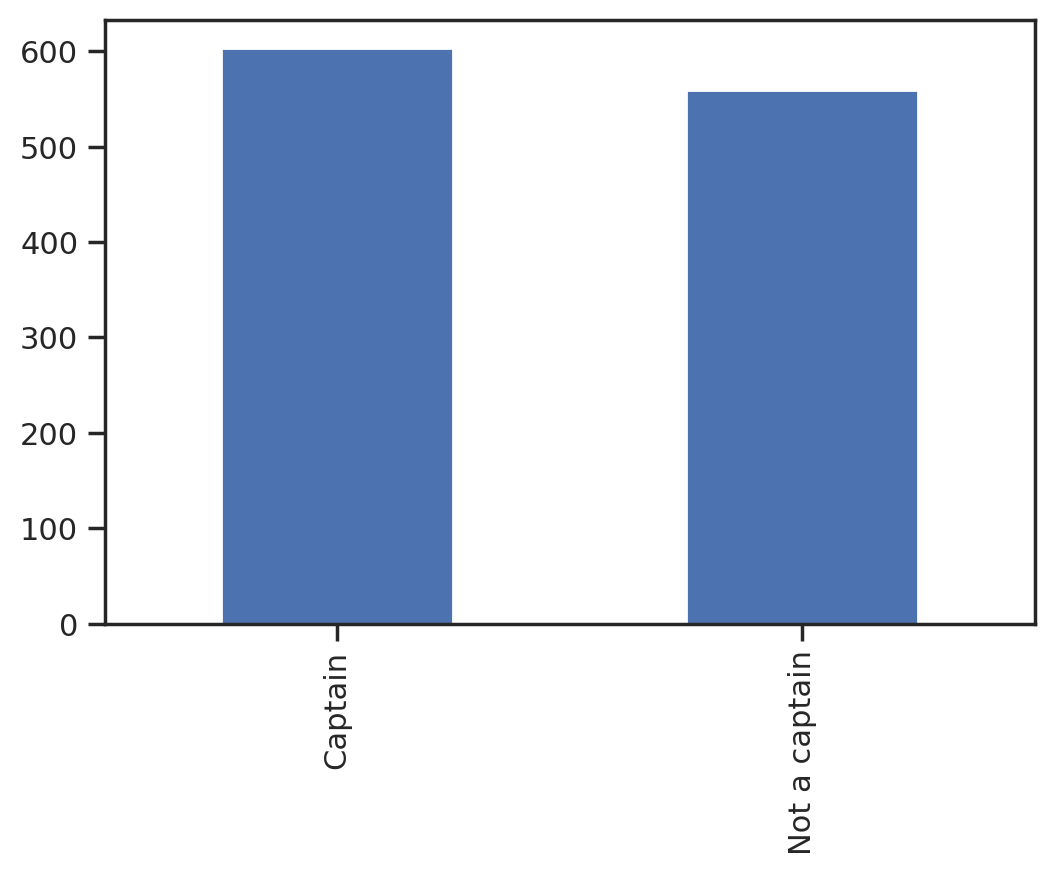

In [43]:
px.bar(average_score,
      text_auto=True,
      title="Did captaincy affect Sachin's score?",
      labels={"x":"Captain: Yes/No","y":"Average score"})

fig_average_score, axes_average_score = plt.subplots()
average_score.plot.bar(ax=axes_average_score)

Sachin scored more runs when he was a captain

In [44]:
year_wise_strike_rate_captain = df[df.Captain == 'Yes'].groupby(['Year'])["Strike Rate"].sum()
year_wise_strike_rate_captain
print("Sachin's average strike rate when he was a captain ",year_wise_strike_rate_captain.mean())

year_wise_strike_rate_not_captain = df[df.Captain == 'No'].groupby(['Year'])["Strike Rate"].sum()
year_wise_strike_rate_not_captain
print("Sachin's average strike rate when he was not a captain ",year_wise_strike_rate_not_captain.mean())

average_strike_rate = pd.Series([year_wise_strike_rate_captain.mean(),
                                 year_wise_strike_rate_not_captain.mean()],
                         index=['Captain','Not a captain'])
average_strike_rate

Year
1996    170.18
1997    595.85
1999    511.53
Name: Strike Rate, dtype: float64

Sachin's average strike rate when he was a captain  425.8533333333333


Year
1990     100.81
1992     302.43
1993     201.62
1994     449.13
1995     104.67
1996     568.01
1998    1268.98
1999     340.23
2000     457.58
2001     695.64
2002     611.24
2003     296.77
2004     406.87
2005     195.42
2006     183.76
2007     333.19
2008     500.74
2009     552.03
2010     841.72
2011     315.05
2012      77.55
Name: Strike Rate, dtype: float64

Sachin's average strike rate when he was not a captain  419.2114285714285


Captain          425.853333
Not a captain    419.211429
dtype: float64

<AxesSubplot:>

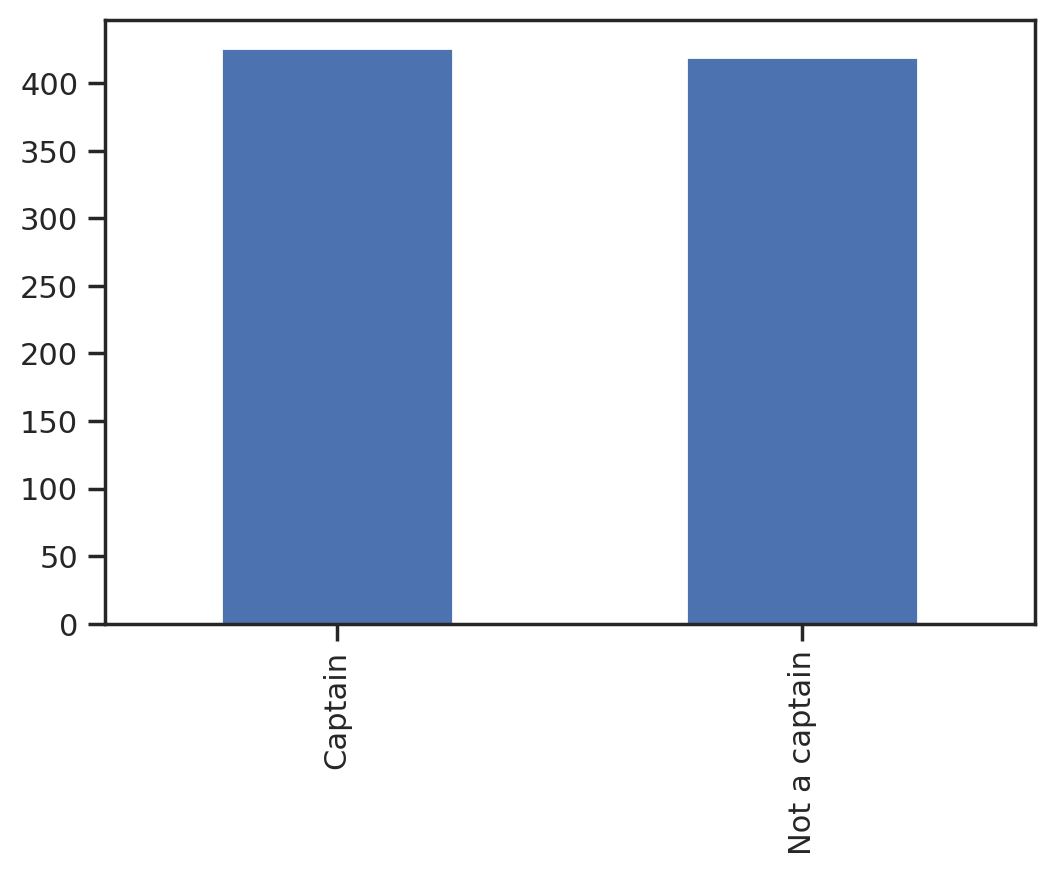

In [45]:
px.bar(average_strike_rate,
      text_auto=True,
      title="Did captaincy affect Sachin's strike rate?",
      labels={"x":"Captain: Yes/No","y":"Average score"})

fig_average_strike_rate, axes_average_strike_rate = plt.subplots()
average_strike_rate.plot.bar(ax=axes_average_strike_rate)

Sachin's strike rate was more runs when he was a captain

### 2.9 Sachin's performance innings wise (chasing/1st batting)

In [46]:
df.Innings.value_counts()

1    53
2    34
3    10
4     3
Name: Innings, dtype: int64

Note: There are tests, ODIs & T20Is. In tests, we have 4 innings. So, chasing can be 2nd or 4th innings

In [47]:
chasing_score = df.loc[df["Innings"].isin([2,4])]
chasing_average_score = chasing_score.Score.mean()
chasing_average_score

136.48648648648648

In [48]:
first_innings_score = df.loc[df["Innings"].isin([1,3])]
first_innings_average_score = first_innings_score.Score.mean()
first_innings_average_score

135.03174603174602

In [49]:
average_score_innings_wise = pd.Series([chasing_average_score,
                                 first_innings_average_score],
                         index=['Chasing','1st innings'])
average_score_innings_wise

Chasing        136.486486
1st innings    135.031746
dtype: float64

In [50]:
px.bar(average_score_innings_wise,
      text_auto=True,
      title="Sachin's average runs innings wise (chasing/1st batting)",)

### 2.10 Sachin's best batting position.

In [51]:
batting_position = df.groupby(['Position']).sum()
batting_position

,S.No.,Score,Innings,Test,Strike Rate,Year
Position,,,,,,
1,251,593,6,0.0,484.03,10009
2,1894,5071,55,0.0,3977.48,80031
4,2633,6985,84,88.0,4913.82,96099
5,269,641,12,9.0,504.05,10011
6,3,267,6,5.0,201.62,3982


In [52]:
px.bar(batting_position,x=batting_position.index,y='Score',
      text_auto=True,
      title="Sachin's best batting position.")

#### Sachin's best batting position was 4th.

### 2.11 How many times did Sachin get a man of the match after scoring a century?

In [53]:
player_of_the_match = df["Player of the match"]
player_of_the_match

0     Yes
1      No
2      No
3      No
4     Yes
     ... 
95     No
96     No
97     No
98     No
99     No
Name: Player of the match, Length: 100, dtype: object

In [54]:
fig_player_of_the_match = px.pie(player_of_the_match,
      names=player_of_the_match.values,
      values=player_of_the_match.index,
      color_discrete_sequence=['Red','Green'],
    title='How many times did Sachin get a man of the match after scoring a century?'
      )
fig_player_of_the_match.update_traces(textposition='inside', textinfo='percent+label')

### 2.12 How many times India won the match after Sachin scored a century?

In [55]:
result = df["Result"]
fig_result = px.pie(result,
      names=result.values,
      values=result.index,
      hole=.4,
      color_discrete_sequence=['Green','Red','Yellow'],
      title='How many times India won the match after Sachin scored a century?'
      )
fig_result.update_traces(textposition='inside', textinfo='percent+label')

### 2.13 How many times Sachin was unbeaten after scoring a century?

In [56]:
dismissed = df["Dismissed"]
fig_result = px.pie(dismissed,
      names=dismissed.values,
      values=dismissed.index,
      hole=.4,
      color_discrete_sequence=['Green','Red'],
      title='How many times Sachin was unbeaten after scoring a century?'
      )
fig_result.update_traces(textposition='inside', textinfo='percent+label')

### Conclusion

#### Thank you for reaching till here. 
#### If you have liked the notebook, hit the  Upvote button & connect with me

* Twitter: http://twitter.com/pranaii1
* LinkedIn: https://linkedin.com/in/bomma-pranay
* GitHub: https://github.com/Bomma-Pranay